1. Filter Effect 
    1. Gaussian White Noise
        1. Small STD Effect
        2. Large STD Effect
    2. mu-Gaussian White Noise 
        1. mu Effect
        2. STD Effect
            1. Small STD Effect
            2. Large STD Effect

In [40]:
import numpy as np
import random

import matplotlib.pyplot as plt

%matplotlib inline

# 1 Filter effect
1. Gaussian White Noise
    1. Small STD Effect
    2. Large STD Effect
2. mu-Gaussian White Noise 
    1. mu Effect
    2. STD Effect
        1. Small STD Effect
        2. Large STD Effect

## 1.1 Gaussian White Noise
1. Small STD Effect
2. Large STD Effect

### 1.A.a Small STD Effect

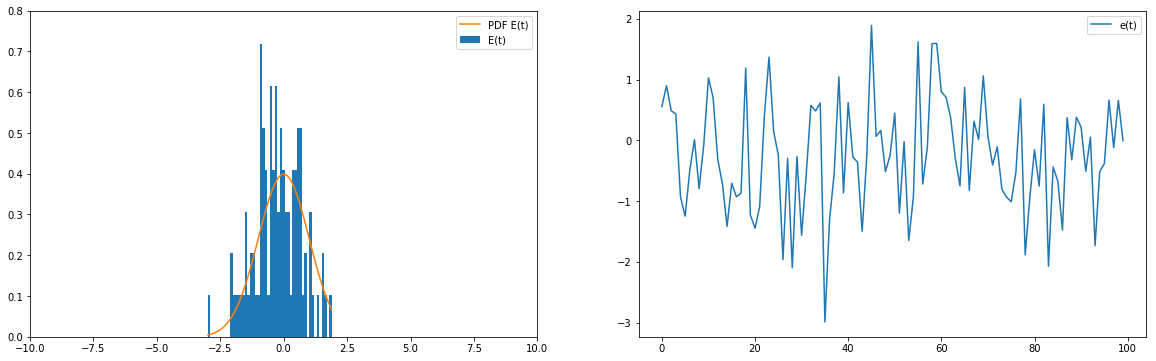

In [2]:
sample_size = 100
mean = 0.
std = 1.

vis_scale = 2



plt.figure(figsize=(20, 6))
plt.subplot(121)
e_t = np.random.normal(loc=mean, scale=std, size=(sample_size, ))
count, bins, ignored = plt.hist(e_t, sample_size//vis_scale, density=True, label='E(t)')
pdf_e_t = 1 / (std * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * std**2))

plt.plot(bins, pdf_e_t, label='PDF E(t)')
plt.xlim(-10, 10)
plt.ylim(0, 0.8)
plt.legend()

plt.subplot(122)
plt.plot(e_t, label='e(t)')
plt.legend()

plt.show()

In [54]:
# case of normalized weights
# weights = np.array([1.5, -0.7, 1, 0.5])
# weights = np.exp(weights)/sum(np.exp(weights))
# weights

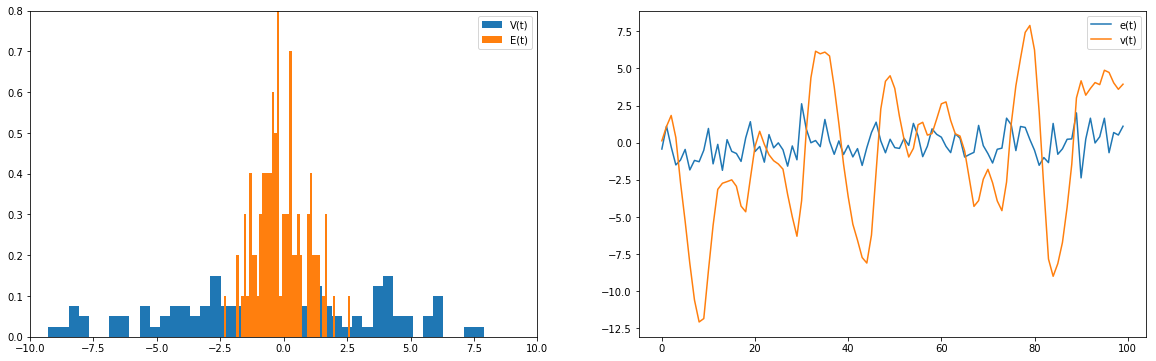

In [55]:
v_t = np.zeros((sample_size))
weights = np.array([1.5, -0.7, 1, 0.5])
for t in range(len(v_t)):
    v_t[t] = np.array([v_t[t-1], v_t[t-2], e_t[t], e_t[t-1]]).dot(weights.T)
    

# visualization
plt.figure(figsize=(20, 6))
plt.subplot(121)

count, bins, ignored = plt.hist(v_t, sample_size//vis_scale, density=True, label='V(t)')
count, bins, ignored = plt.hist(e_t, sample_size//vis_scale, density=True, label='E(t)')

plt.xlim(-10, 10)
plt.ylim(0, 0.8)
plt.legend()

plt.subplot(122)
plt.plot(e_t, label='e(t)')
plt.plot(v_t, label='v(t)')
plt.legend()

plt.show()

In [ ]:
# explanations

### 1.A.b Large STD Effect

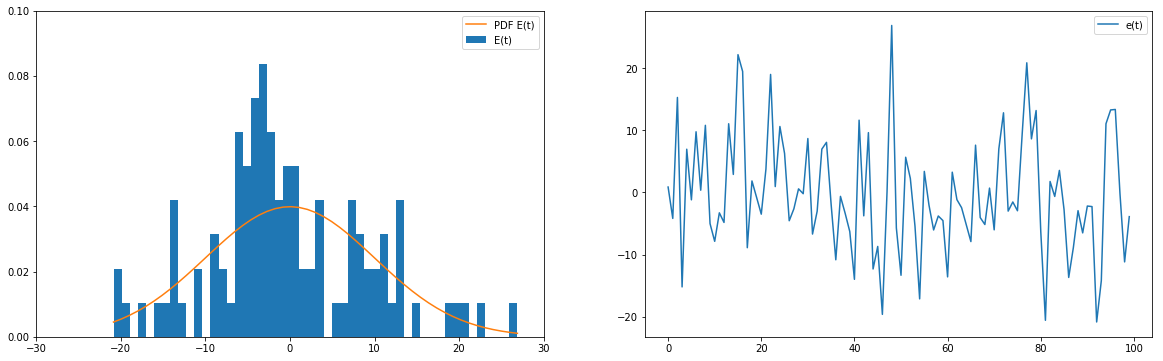

In [4]:
sample_size = 100
mean = 0.
std = 10.

vis_scale = 2



plt.figure(figsize=(20, 6))
plt.subplot(121)
e_t = np.random.normal(loc=mean, scale=std, size=(sample_size, ))
count, bins, ignored = plt.hist(e_t, sample_size//vis_scale, density=True, label='E(t)')
pdf_e_t = 1 / (std * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * std**2))

plt.plot(bins, pdf_e_t, label='PDF E(t)')
plt.xlim(-30, 30)
plt.ylim(0, 0.1)
plt.legend()

plt.subplot(122)
plt.plot(e_t, label='e(t)')
plt.legend()

plt.show()

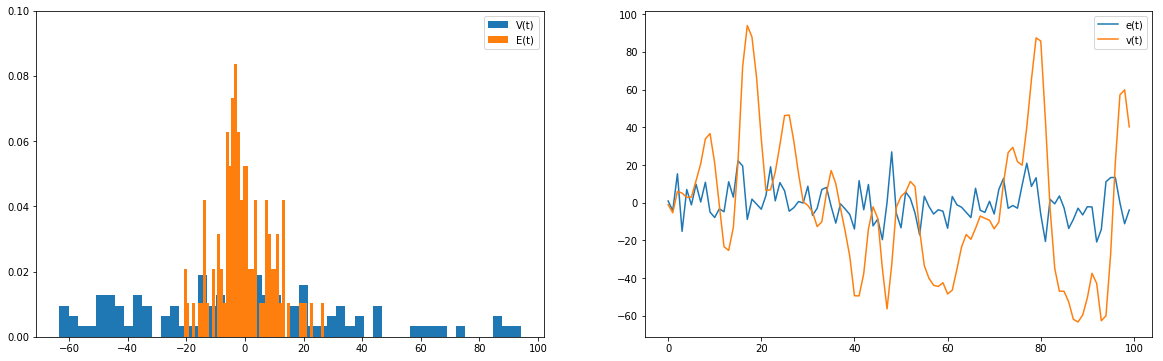

In [5]:
v_t = np.zeros((sample_size))
weights = np.array([1.5, -0.7, 1, 0.5])

for t in range(len(v_t)):
    v_t[t] = np.array([v_t[t-1], v_t[t-2], e_t[t], e_t[t-1]]).dot(weights.T)
    

# visualization
plt.figure(figsize=(20, 6))
plt.subplot(121)
count, bins, ignored = plt.hist(v_t, sample_size//vis_scale, density=True, label='V(t)')
count, bins, ignored = plt.hist(e_t, sample_size//vis_scale, density=True, label='E(t)')

# plt.xlim(-10, 10)
plt.ylim(0, 0.1)
plt.legend()

plt.subplot(122)
plt.plot(e_t, label='e(t)')
plt.plot(v_t, label='v(t)')
plt.legend()

plt.show()

## 1.2 mu-Gaussian White Noise
1. mu Effect
2. STD Effect
    1. Small STD Effect
    2. Large STD Effect

### 1.B.a mu Effect

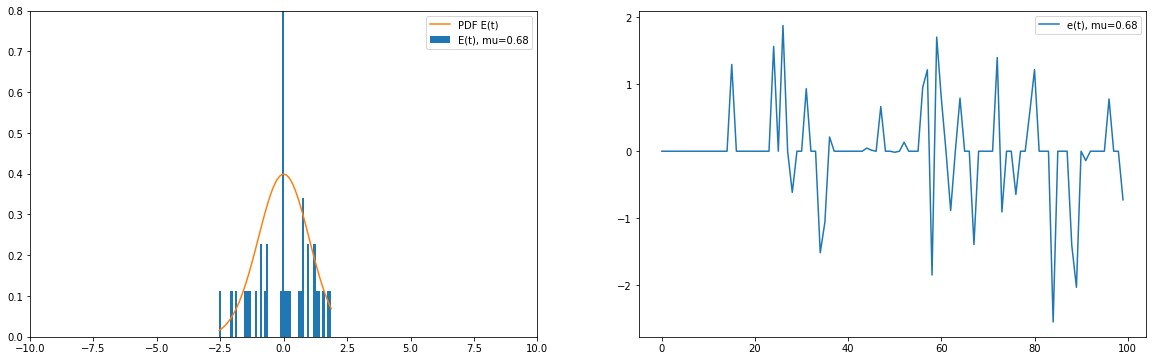

In [10]:
sample_size = 100
mean = 0.
std = 1.

vis_scale = 2

mu = np.random.random()
r = np.random.normal(loc=mean, scale=std, size=(sample_size, ))
mask = random.sample(set(np.arange(sample_size)), int(mu * sample_size))
r[mask] = 0
e_t = r

# visualization
plt.figure(figsize=(20, 6))
plt.subplot(121)
count, bins, ignored = plt.hist(e_t, sample_size//vis_scale, density=True, label='E(t), mu='+str(mu)[:4])
pdf_e_t = 1 / (std * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * std**2))

plt.plot(bins, pdf_e_t, label='PDF E(t)')
plt.xlim(-10, 10)
plt.ylim(0, 0.8)
plt.legend()

plt.subplot(122)
plt.plot(e_t, label='e(t), mu='+str(mu)[:4])
plt.legend()

plt.show()

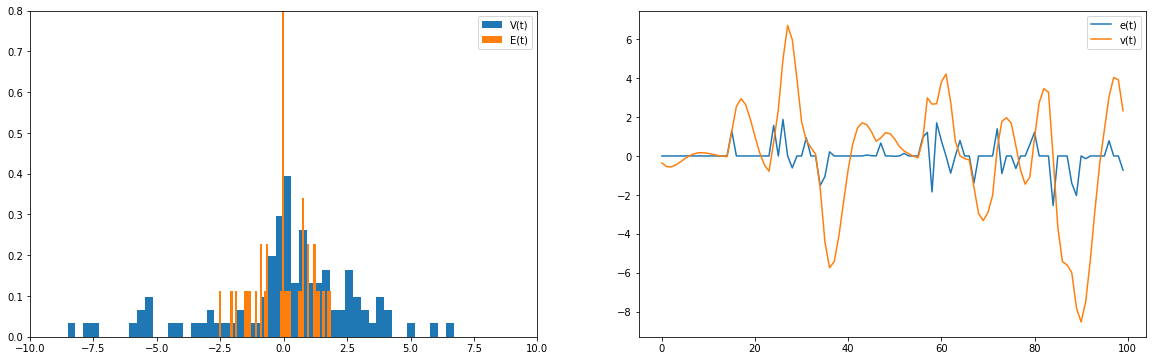

In [11]:
v_t = np.zeros((sample_size))
weights = np.array([1.5, -0.7, 1, 0.5])
# weights = np.ones((4,))*0.1
for t in range(len(v_t)):
    v_t[t] = np.array([v_t[t-1], v_t[t-2], e_t[t], e_t[t-1]]).dot(weights.T)
    

# visualization
plt.figure(figsize=(20, 6))
plt.subplot(121)
_, _, _ = plt.hist(v_t, sample_size//vis_scale, density=True, label='V(t)')
count, bins, ignored = plt.hist(e_t, sample_size//vis_scale, density=True, label='E(t)')

plt.xlim(-10, 10)
plt.ylim(0, 0.8)
plt.legend()

plt.subplot(122)
plt.plot(e_t, label='e(t)')
plt.plot(v_t, label='v(t)')
plt.legend()

plt.show()

In [ ]:
# explanation

### 1.B.b STD Effect
1. Small STD Effect
2. Large STD Effect

#### 1.B.b.i Small STD Effect

In [ ]:
# same as above

#### 1.B.b.ii Large STD Effect

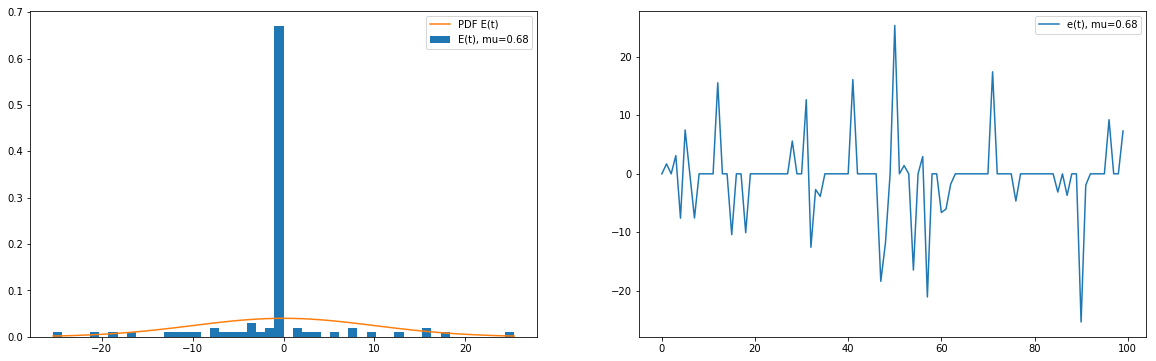

In [12]:
sample_size = 100
mean = 0.
std = 10.

vis_scale = 2

# mu = np.random.random()  # we use same mu from small STD effect
r = np.random.normal(loc=mean, scale=std, size=(sample_size, ))
mask = random.sample(set(np.arange(sample_size)), int(mu * sample_size))
r[mask] = 0
e_t = r

# visualization
plt.figure(figsize=(20, 6))
plt.subplot(121)
count, bins, ignored = plt.hist(e_t, sample_size//vis_scale, density=True, label='E(t), mu='+str(mu)[:4])
pdf_e_t = 1 / (std * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * std**2))

plt.plot(bins, pdf_e_t, label='PDF E(t)')
# plt.xlim(-10, 10)
# plt.ylim(0, 0.8)
plt.legend()

plt.subplot(122)
plt.plot(e_t, label='e(t), mu='+str(mu)[:4])
plt.legend()

plt.show()

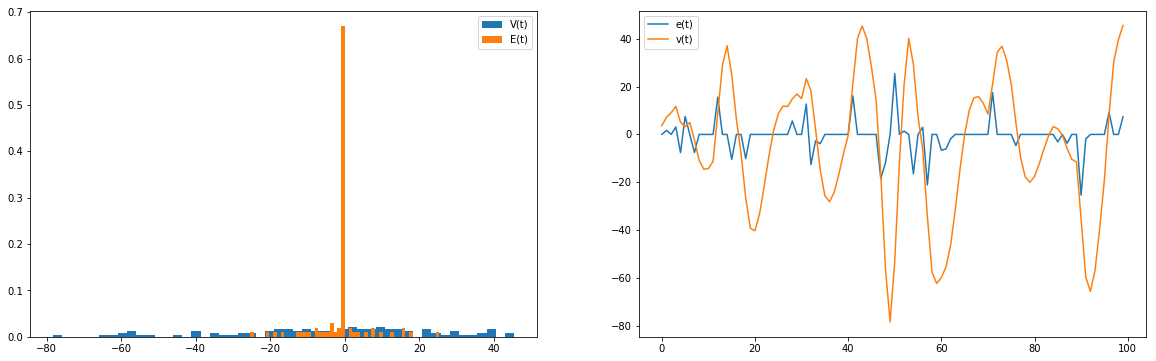

In [13]:
v_t = np.zeros((sample_size))
weights = np.array([1.5, -0.7, 1, 0.5])

for t in range(len(v_t)):
    v_t[t] = np.array([v_t[t-1], v_t[t-2], e_t[t], e_t[t-1]]).dot(weights.T)
    

# visualization
plt.figure(figsize=(20, 6))
plt.subplot(121)
count, bins, ignored = plt.hist(v_t, sample_size//vis_scale, density=True, label='V(t)')
count, bins, ignored = plt.hist(e_t, sample_size//vis_scale, density=True, label='E(t)')

# plt.xlim(-10, 10)
# plt.ylim(0, 0.8)
plt.legend()

plt.subplot(122)
plt.plot(e_t, label='e(t)')
plt.plot(v_t, label='v(t)')
plt.legend()

plt.show()

## 2 Stationary

### 2.1 Means
1. 100
2. 10,000
3. 1,000,000

#### 2.1.1 100

In [6]:
realization_size = 100
v_t = np.zeros((sample_size))

mean = 0
std = 1
weights = np.array([1.5, -0.7, 1, 0.5])

v_t = np.zeros((realization_size, sample_size))

for r in range(realization_size):
    e_t = np.random.normal(loc=mean, scale=std, size=(sample_size, ))
    for t in range(sample_size):
        v_t[r, t] = np.array([v_t[r, t-1], v_t[r, t-2], e_t[t], e_t[t-1]]).dot(weights.T)
v_t.shape

(100, 100)

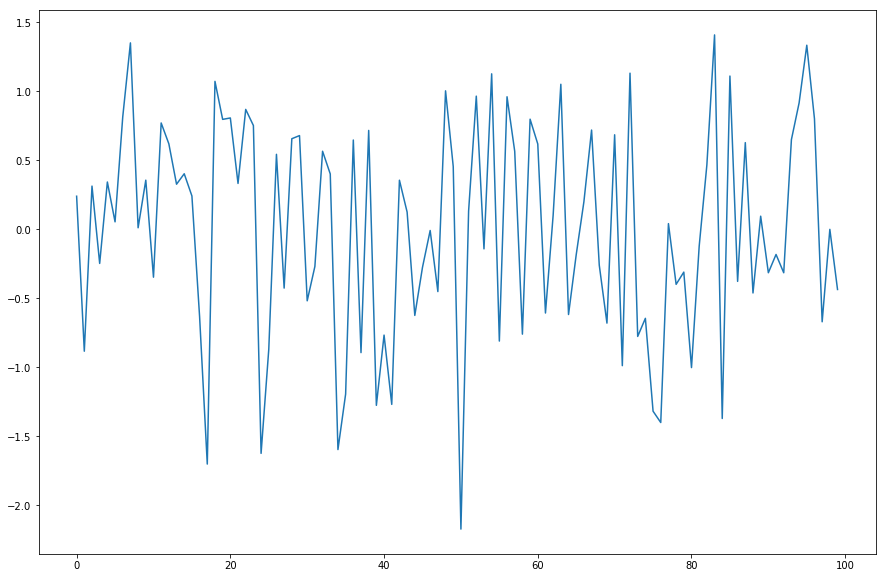

In [7]:
mean_samples = v_t.mean(axis=-1)
plt.figure(figsize=(15, 10))
plt.plot(mean_samples[random.sample(set(range(len(mean_samples))), 100)])

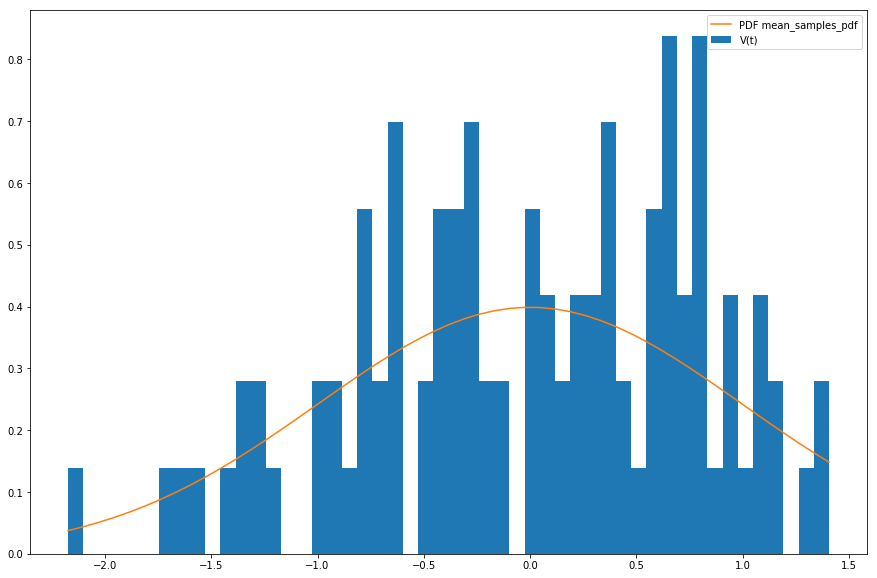

In [11]:
plt.figure(figsize=(15, 10))
count, bins, ignored = plt.hist(mean_samples, sample_size//vis_scale, density=True, label='V(t)')
mean_samples_pdf = 1 / (std * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * std**2))
plt.plot(bins, mean_samples_pdf, label='PDF mean_samples_pdf')
plt.legend()

In [9]:
mean_samples.mean()

-0.0021315391014241412

In [10]:
v_t.mean()

-0.0021315391014241469

#### 2.1.2 10000

In [12]:
realization_size = 10000
v_t = np.zeros((sample_size))

mean = 0
std = 1
weights = np.array([1.5, -0.7, 1, 0.5])

v_t = np.zeros((realization_size, sample_size))

for r in range(realization_size):
    e_t = np.random.normal(loc=mean, scale=std, size=(sample_size, ))
    for t in range(sample_size):
        v_t[r, t] = np.array([v_t[r, t-1], v_t[r, t-2], e_t[t], e_t[t-1]]).dot(weights.T)
v_t.shape

(10000, 100)

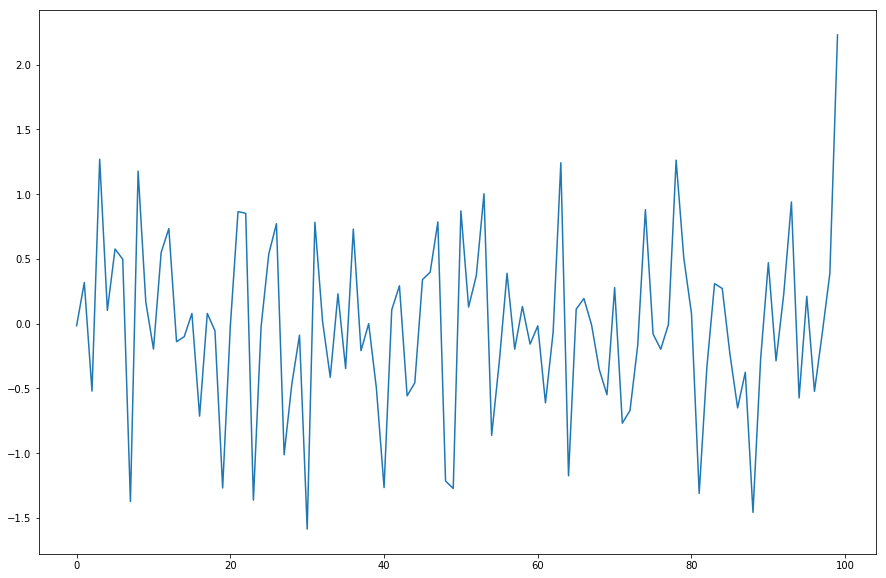

In [13]:
mean_samples = v_t.mean(axis=-1)
plt.figure(figsize=(15, 10))
plt.plot(mean_samples[random.sample(set(range(len(mean_samples))), 100)])

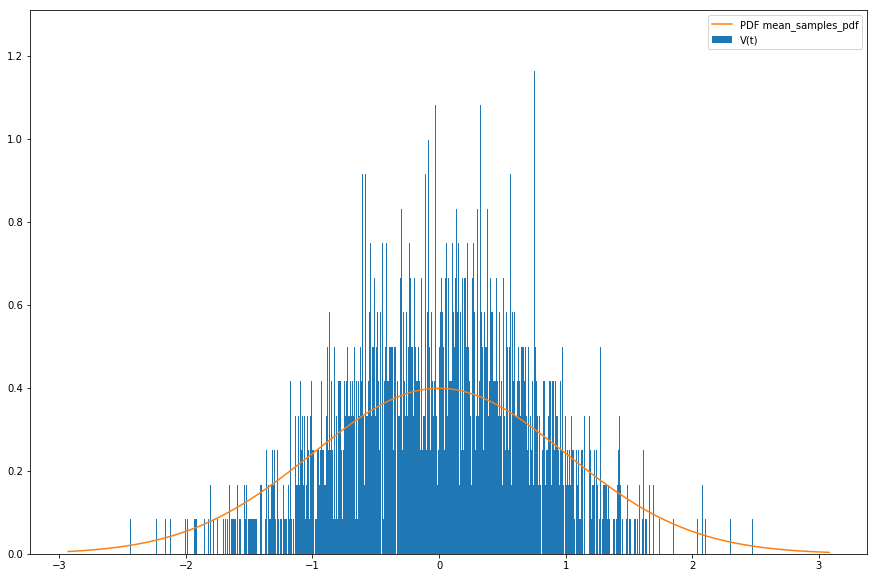

In [14]:
plt.figure(figsize=(15, 10))
count, bins, ignored = plt.hist(mean_samples, sample_size//vis_scale*100, density=True, label='V(t)')
mean_samples_pdf = 1 / (std * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * std**2))
plt.plot(bins, mean_samples_pdf, label='PDF mean_samples_pdf')
plt.legend()

In [15]:
mean_samples.mean()

0.0048791247402978572

In [16]:
v_t.mean()

0.004879124740297858

#### 2.1.3 1000000

In [6]:
realization_size = 1000000
v_t = np.zeros((sample_size), dtype=np.float32)

mean = 0
std = 1
weights = np.array([1.5, -0.7, 1, 0.5])

v_t = np.zeros((realization_size, sample_size))

for r in range(realization_size):
    e_t = np.random.normal(loc=mean, scale=std, size=(sample_size, ))
    for t in range(sample_size):
        v_t[r, t] = np.array([v_t[r, t-1], v_t[r, t-2], e_t[t], e_t[t-1]]).dot(weights.T)
v_t.shape

(1000000, 100)

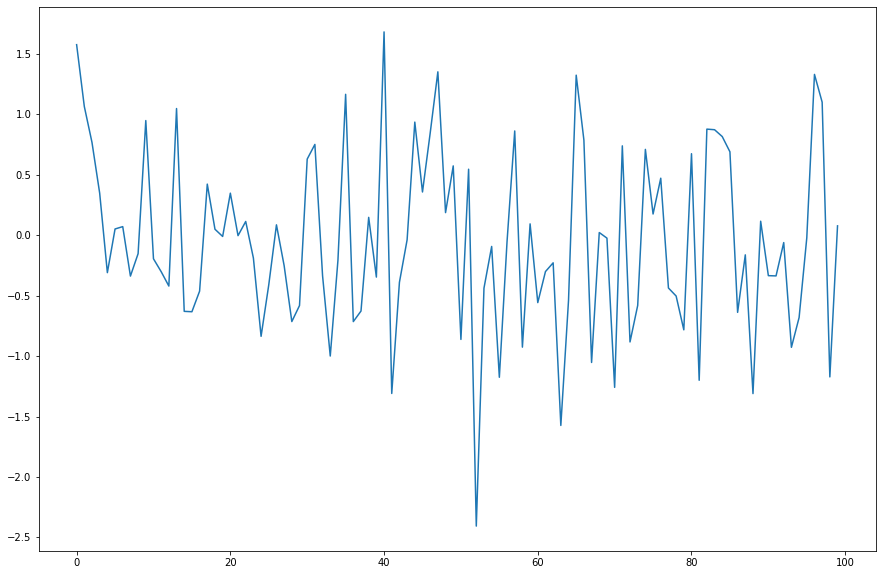

In [9]:
mean_samples = v_t.mean(axis=-1)
plt.figure(figsize=(15, 10))
plt.plot(mean_samples[random.sample(set(range(len(mean_samples))), 100)])

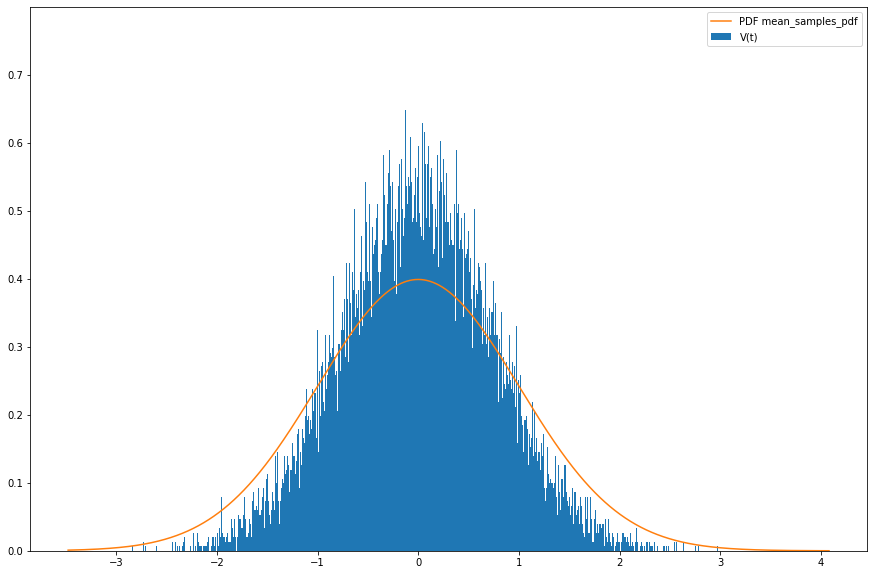

In [13]:
plt.figure(figsize=(15, 10))
count, bins, ignored = plt.hist(mean_samples, sample_size//vis_scale*1000, density=True, label='V(t)')
mean_samples_pdf = 1 / (std * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * std**2))
plt.plot(bins, mean_samples_pdf, label='PDF mean_samples_pdf')
plt.legend()

### 2.2 Correlation
1. 100
2. 10000
3. 1000000

#### 2.2.1 100

In [32]:
realization_size = 100
v_t = np.zeros((sample_size))

mean = 0
std = 1
weights = np.array([1.5, -0.7, 1, 0.5])

v_t = np.zeros((realization_size, sample_size))

for r in range(realization_size):
    e_t = np.random.normal(loc=mean, scale=std, size=(sample_size, ))
    for t in range(sample_size):
        v_t[r, t] = np.array([v_t[r, t-1], v_t[r, t-2], e_t[t], e_t[t-1]]).dot(weights.T)
v_t.shape

(100, 100)

0.564982
0.079877
0.625283
0.15217
0.112034
0.0493748
0.0524141
0.00573238
0.000943975


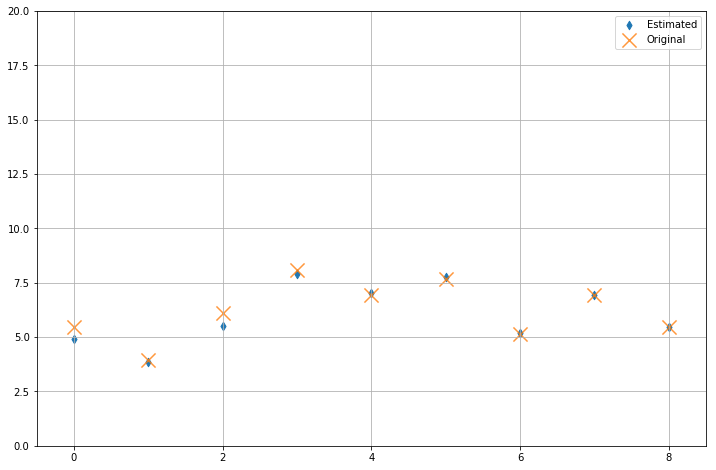

In [33]:
shift = 3
t1 = 10
t2 = t1 + shift

r_v_diff = []
correlations = []
r_vs = []
for i in range(sample_size//10 - 1):
    t1 = (i+1) * 10
    t2 = t1 + shift
    
    correlation = np.cov(v_t[:, t1], v_t[:, t2])[0, 1]
    correlations.append(correlation)
    # same as above - changed due to memory limit
    # cov = np.cov(v_t, rowvar=False)
    # cov[t1, t2]
    r_v = np.sum(np.multiply(v_t[:, t1], v_t[:, t2])) / realization_size
    r_vs.append(r_v)
    r_v_diff.append(np.abs(correlation - r_v).astype(np.float32))
    print(r_v_diff[i])

plt.figure(figsize=(12, 8))
plt.ylim(0, 20)
plt.scatter(np.arange(9), correlations, marker='d',label='Estimated')
plt.scatter(np.arange(9), r_vs, alpha=0.8, marker='x',s=200,  label='Original')
plt.legend()
plt.grid()
plt.show()

1.14469
0.037566
0.894594
0.101099
0.128796
0.20512
0.19891
0.169702
0.152601


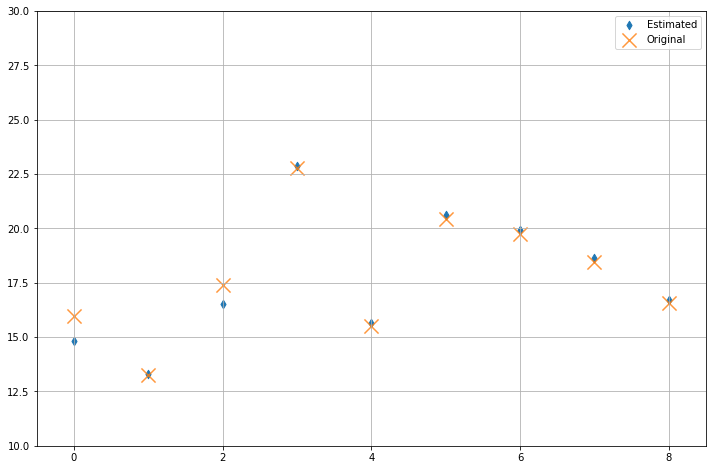

In [34]:
shift = 0
t1 = 10
t2 = t1 + shift

r_v_diff = []
correlations = []
r_vs = []
for i in range(sample_size//10 - 1):
    t1 = (i+1) * 10
    t2 = t1 + shift
    
    correlation = np.cov(v_t[:, t1], v_t[:, t2])[0, 1]
    correlations.append(correlation)
    # same as above - changed due to memory limit
    # cov = np.cov(v_t, rowvar=False)
    # cov[t1, t2]
    r_v = np.sum(np.multiply(v_t[:, t1], v_t[:, t2])) / realization_size
    r_vs.append(r_v)
    r_v_diff.append(np.abs(correlation - r_v).astype(np.float32))
    print(r_v_diff[i])

plt.figure(figsize=(12, 8))
plt.ylim(10, 30)
plt.scatter(np.arange(9), correlations, marker='d',label='Estimated')
plt.scatter(np.arange(9), r_vs, alpha=0.8, marker='x',s=200,  label='Original')
plt.legend()
plt.grid()
plt.show()

5.44372729981
6.74936524861
-0.22023060379
######################
0.0852773
0.0799099
0.258898
0.280335
0.148737
0.0663384
0.0480033
0.147759
0.00556006


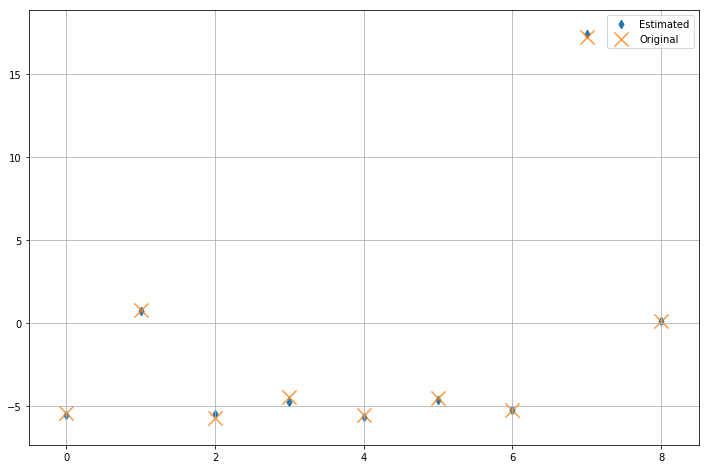

In [35]:
correlation = np.cov(v_t[:, 90], v_t[:, 93])[0, 1]
print(correlation)
correlation = np.cov(v_t[:, 14], v_t[:, 17])[0, 1]
print(correlation)
correlation = np.cov(v_t[:, 14], v_t[:, 19])[0, 1]
print(correlation)

print('######################')

r_v_diff = []
correlations = []
r_vs = []
for i in range(sample_size//10 - 1):
    t1 = (i+1) * 10
    t2 = t1 + np.random.randint(low=0, high=9)
    
    correlation = np.cov(v_t[:, t1], v_t[:, t2])[0, 1]
    correlations.append(correlation)
    # same as above - changed due to memory limit
    # cov = np.cov(v_t, rowvar=False)
    # cov[t1, t2]
    r_v = np.sum(np.multiply(v_t[:, t1], v_t[:, t2])) / realization_size
    r_vs.append(r_v)
    r_v_diff.append(np.abs(correlation - r_v).astype(np.float32))
    print(r_v_diff[i])

plt.figure(figsize=(12, 8))
plt.scatter(np.arange(9), correlations, marker='d',label='Estimated')
plt.scatter(np.arange(9), r_vs, alpha=0.8, marker='x',s=200,  label='Original')
plt.legend()
plt.grid()
plt.show()

#### 2.2.2 10000

In [41]:
realization_size = 10000
v_t = np.zeros((sample_size))

mean = 0
std = 1
weights = np.array([1.5, -0.7, 1, 0.5])

v_t = np.zeros((realization_size, sample_size))

for r in range(realization_size):
    e_t = np.random.normal(loc=mean, scale=std, size=(sample_size, ))
    for t in range(sample_size):
        v_t[r, t] = np.array([v_t[r, t-1], v_t[r, t-2], e_t[t], e_t[t-1]]).dot(weights.T)
v_t.shape

(10000, 100)

0.000243487
0.000507182
0.000648129
0.000740227
0.000936986
0.00109164
0.000463128
0.000507722
0.000481465


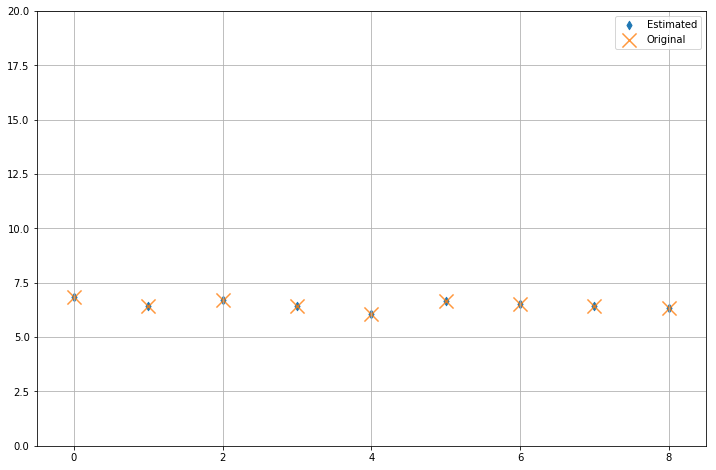

In [39]:
shift = 3
t1 = 10
t2 = t1 + shift

r_v_diff = []
correlations = []
r_vs = []
for i in range(sample_size//10 - 1):
    t1 = (i+1) * 10
    t2 = t1 + shift
    
    correlation = np.cov(v_t[:, t1], v_t[:, t2])[0, 1]
    correlations.append(correlation)
    # same as above - changed due to memory limit
    # cov = np.cov(v_t, rowvar=False)
    # cov[t1, t2]
    r_v = np.sum(np.multiply(v_t[:, t1], v_t[:, t2])) / realization_size
    r_vs.append(r_v)
    r_v_diff.append(np.abs(correlation - r_v).astype(np.float32))
    print(r_v_diff[i])

plt.figure(figsize=(12, 8))
plt.ylim(0, 20)
plt.scatter(np.arange(9), correlations, marker='d',label='Estimated')
plt.scatter(np.arange(9), r_vs, alpha=0.8, marker='x',s=200,  label='Original')
plt.legend()
plt.grid()
plt.show()

0.00155549
0.00179923
0.00179535
0.00184982
0.00179027
0.00071957
6.63409e-05
0.00184732
0.00189629


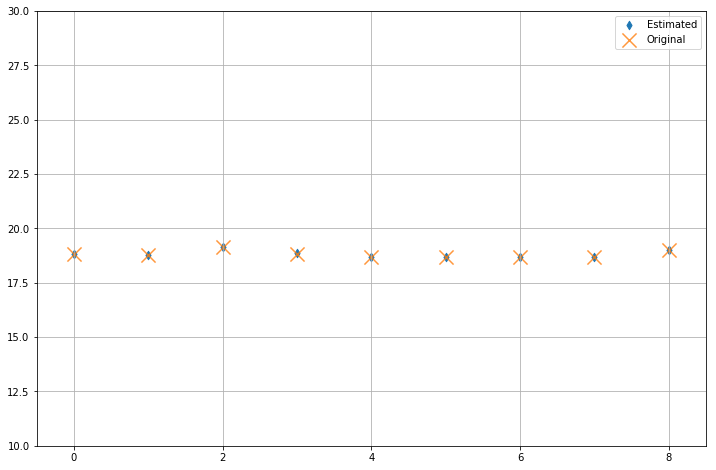

In [37]:
shift = 0
t1 = 10
t2 = t1 + shift

r_v_diff = []
correlations = []
r_vs = []
for i in range(sample_size//10 - 1):
    t1 = (i+1) * 10
    t2 = t1 + shift
    
    correlation = np.cov(v_t[:, t1], v_t[:, t2])[0, 1]
    correlations.append(correlation)
    # same as above - changed due to memory limit
    # cov = np.cov(v_t, rowvar=False)
    # cov[t1, t2]
    r_v = np.sum(np.multiply(v_t[:, t1], v_t[:, t2])) / realization_size
    r_vs.append(r_v)
    r_v_diff.append(np.abs(correlation - r_v).astype(np.float32))
    print(r_v_diff[i])

plt.figure(figsize=(12, 8))
plt.ylim(10, 30)
plt.scatter(np.arange(9), correlations, marker='d',label='Estimated')
plt.scatter(np.arange(9), r_vs, alpha=0.8, marker='x',s=200,  label='Original')
plt.legend()
plt.grid()
plt.show()

6.32753060378
6.37832340846
-2.87657952376
######################
0.00083364
0.00119604
0.000648129
0.00184982
0.000241859
0.00352859
0.00276258
0.000107086
0.000541877


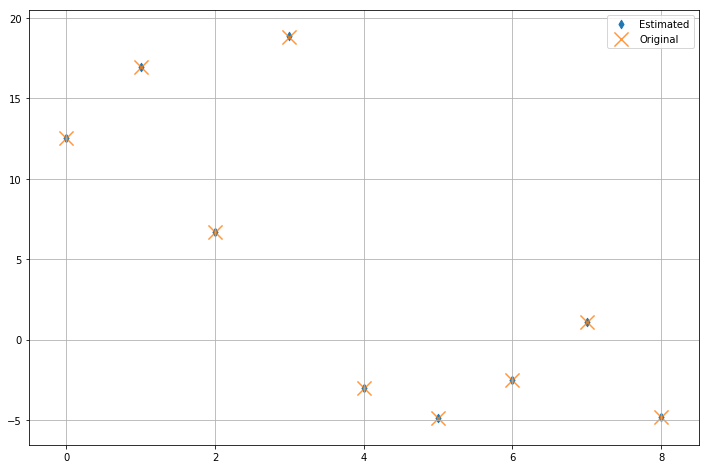

In [38]:
correlation = np.cov(v_t[:, 90], v_t[:, 93])[0, 1]
print(correlation)
correlation = np.cov(v_t[:, 14], v_t[:, 17])[0, 1]
print(correlation)
correlation = np.cov(v_t[:, 14], v_t[:, 19])[0, 1]
print(correlation)

print('######################')

r_v_diff = []
correlations = []
r_vs = []
for i in range(sample_size//10 - 1):
    t1 = (i+1) * 10
    t2 = t1 + np.random.randint(low=0, high=9)
    
    correlation = np.cov(v_t[:, t1], v_t[:, t2])[0, 1]
    correlations.append(correlation)
    # same as above - changed due to memory limit
    # cov = np.cov(v_t, rowvar=False)
    # cov[t1, t2]
    r_v = np.sum(np.multiply(v_t[:, t1], v_t[:, t2])) / realization_size
    r_vs.append(r_v)
    r_v_diff.append(np.abs(correlation - r_v).astype(np.float32))
    print(r_v_diff[i])

plt.figure(figsize=(12, 8))
plt.scatter(np.arange(9), correlations, marker='d',label='Estimated')
plt.scatter(np.arange(9), r_vs, alpha=0.8, marker='x',s=200,  label='Original')
plt.legend()
plt.grid()
plt.show()

#### 2.2.3 1000000

In [6]:
realization_size = 1000000
v_t = np.zeros((sample_size), dtype=np.float32)

mean = 0
std = 1
weights = np.array([1.5, -0.7, 1, 0.5])

v_t = np.zeros((realization_size, sample_size))

for r in range(realization_size):
    e_t = np.random.normal(loc=mean, scale=std, size=(sample_size, ))
    for t in range(sample_size):
        v_t[r, t] = np.array([v_t[r, t-1], v_t[r, t-2], e_t[t], e_t[t-1]]).dot(weights.T)
v_t.shape

(1000000, 100)

6.0271623e-06
2.4011188e-06
1.9897896e-05
5.8815276e-05
1.8495724e-05
1.6726462e-05
3.1347863e-05
1.4759243e-06
9.166099e-06


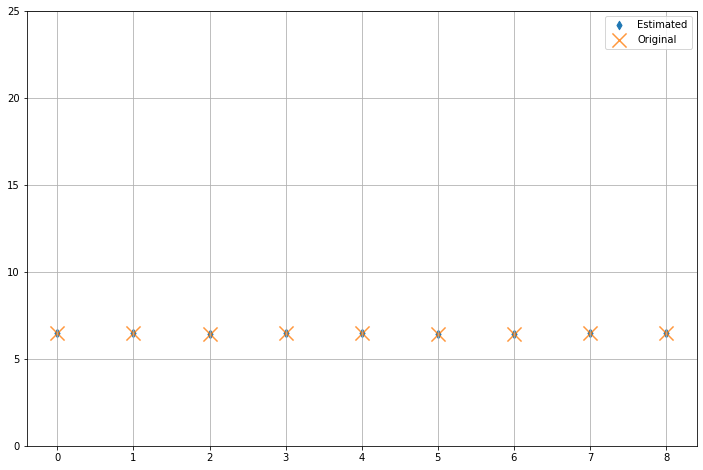

In [18]:
shift = 3
t1 = 10
t2 = t1 + shift

r_v_diff = []
correlations = []
r_vs = []
for i in range(sample_size//10 - 1):
    t1 = (i+1) * 10
    t2 = t1 + shift
    
    correlation = np.cov(v_t[:, t1], v_t[:, t2])[0, 1]
    correlations.append(correlation)
    # same as above - changed due to memory limit
    # cov = np.cov(v_t, rowvar=False)
    # cov[t1, t2]
    r_v = np.sum(np.multiply(v_t[:, t1], v_t[:, t2])) / realization_size
    r_vs.append(r_v)
    r_v_diff.append(np.abs(correlation - r_v).astype(np.float32))
    print(r_v_diff[i])

plt.figure(figsize=(12, 8))
plt.ylim(0, 25)
plt.scatter(np.arange(9), correlations, marker='d',label='Estimated')
plt.scatter(np.arange(9), r_vs, alpha=0.8, marker='x',s=200,  label='Original')
plt.legend()
plt.grid()
plt.show()

1.5811689e-05
4.531954e-06
1.1575447e-05
3.0622068e-05
2.8719862e-06
8.749597e-06
1.9528876e-05
8.068812e-06
1.8186984e-05


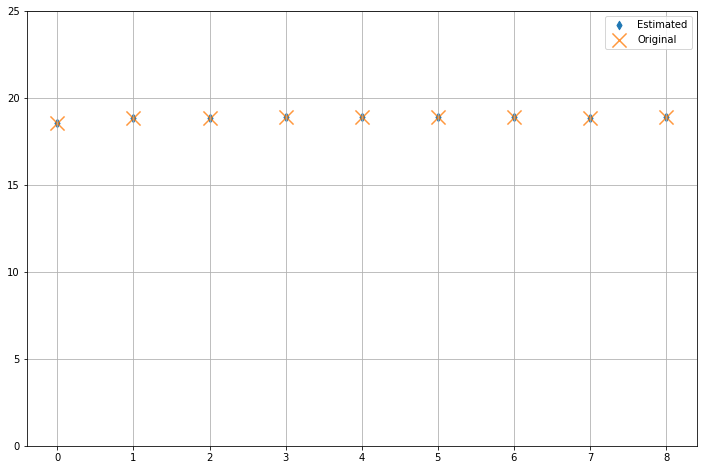

In [17]:
shift = 0
t1 = 10
t2 = t1 + shift

r_v_diff = []
correlations = []
r_vs = []
for i in range(sample_size//10 - 1):
    t1 = (i+1) * 10
    t2 = t1 + shift
    
    correlation = np.cov(v_t[:, t1], v_t[:, t2])[0, 1]
    correlations.append(correlation)
    # same as above - changed due to memory limit
    # cov = np.cov(v_t, rowvar=False)
    # cov[t1, t2]
    r_v = np.sum(np.multiply(v_t[:, t1], v_t[:, t2])) / realization_size
    r_vs.append(r_v)
    r_v_diff.append(np.abs(correlation - r_v).astype(np.float32))
    print(r_v_diff[i])

plt.figure(figsize=(12, 8))
plt.ylim(0, 25)
plt.scatter(np.arange(9), correlations, marker='d',label='Estimated')
plt.scatter(np.arange(9), r_vs, alpha=0.8, marker='x',s=200,  label='Original')
plt.legend()
plt.grid()
plt.show()

6.468578162135945
6.438288119005857
-2.7860009898076004
######################
3.0525323e-06
2.4011188e-06
1.7894732e-05
3.531434e-05
1.584557e-05
9.0144475e-08
2.7821343e-05
1.2029141e-05
1.7443079e-05


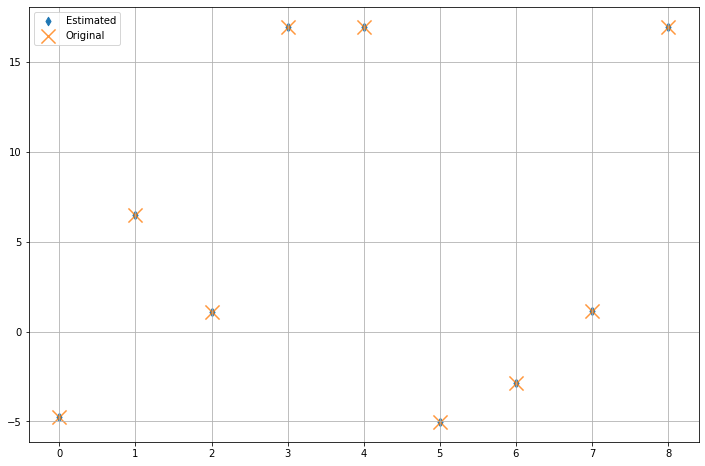

In [16]:
correlation = np.cov(v_t[:, 90], v_t[:, 93])[0, 1]
print(correlation)
correlation = np.cov(v_t[:, 14], v_t[:, 17])[0, 1]
print(correlation)
correlation = np.cov(v_t[:, 14], v_t[:, 19])[0, 1]
print(correlation)

print('######################')

r_v_diff = []
correlations = []
r_vs = []
for i in range(sample_size//10 - 1):
    t1 = (i+1) * 10
    t2 = t1 + np.random.randint(low=0, high=9)
    
    correlation = np.cov(v_t[:, t1], v_t[:, t2])[0, 1]
    correlations.append(correlation)
    # same as above - changed due to memory limit
    # cov = np.cov(v_t, rowvar=False)
    # cov[t1, t2]
    r_v = np.sum(np.multiply(v_t[:, t1], v_t[:, t2])) / realization_size
    r_vs.append(r_v)
    r_v_diff.append(np.abs(correlation - r_v).astype(np.float32))
    print(r_v_diff[i])

plt.figure(figsize=(12, 8))
plt.scatter(np.arange(9), correlations, marker='d',label='Estimated')
plt.scatter(np.arange(9), r_vs, alpha=0.8, marker='x',s=200,  label='Original')
plt.legend()
plt.grid()
plt.show()

## 3 PSD

### 3.1

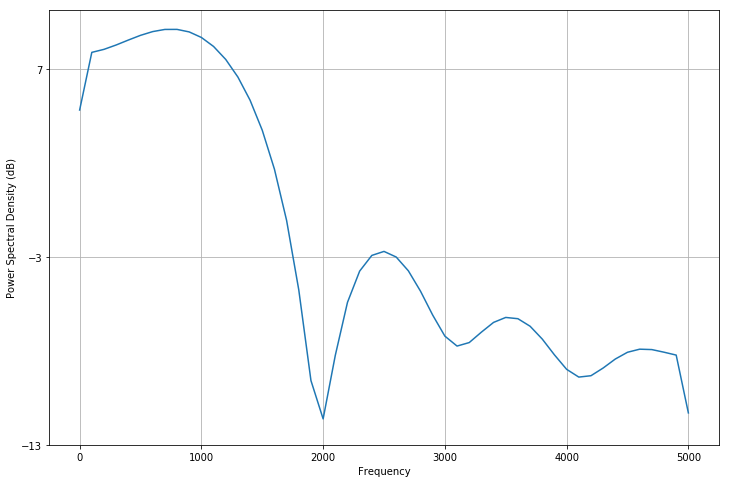

In [43]:
from scipy.signal import periodogram

window = np.zeros((sample_size, ))
window_size = 5
window[sample_size//2 - window_size: sample_size//2 + window_size] = 1

realization = v_t[np.random.randint(0, v_t.shape[0])]
# psd = periodogram(realization, fs=1e4, window=window, scaling='density')[1]

plt.figure(figsize=(12, 8))
psd = plt.psd(realization, NFFT=100, Fs=1e4, window=window, scale_by_freq=False)[0]

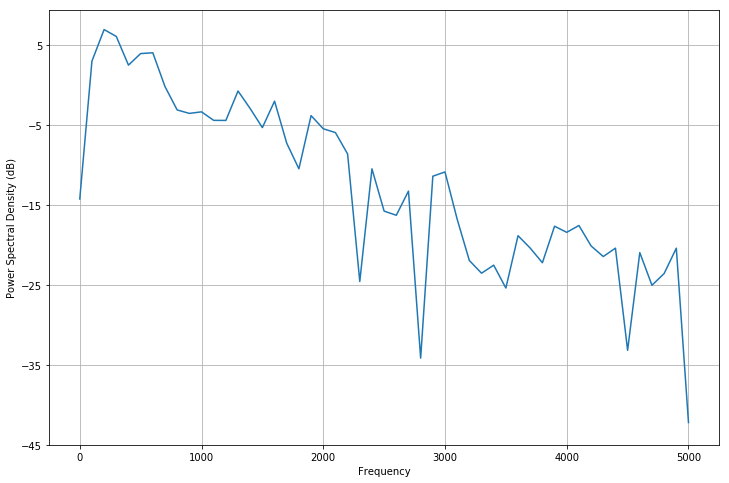

In [291]:
window_size = 20
window[sample_size//2 - window_size: sample_size//2 + window_size] = 1
plt.figure(figsize=(12, 8))
psd = plt.psd(realization, NFFT=100, Fs=1e4, window=window, scale_by_freq=False)[0]

### 3.2

<Figure size 432x288 with 0 Axes>

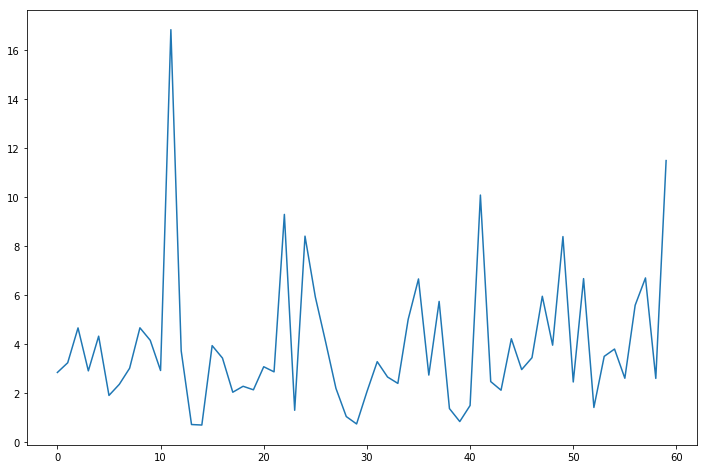

In [311]:
window = np.zeros((sample_size, ))
window_size = 5
window[sample_size//2 - window_size: sample_size//2 + window_size] = 1

num_psds = 60
psds = np.zeros((num_psds, psd.shape[0]))

realizations = v_t[random.sample(set(list(np.arange(v_t.shape[0]))), num_psds), :]

for i in range(num_psds):
    psds[i, :] = plt.psd(realizations[i], NFFT=100, Fs=1e4, window=window, scale_by_freq=False)[0]
    plt.clf()

mean_psds = psds.mean(axis=-1)
plt.figure(figsize=(12, 8))
plt.plot(mean_psds)

<Figure size 432x288 with 0 Axes>

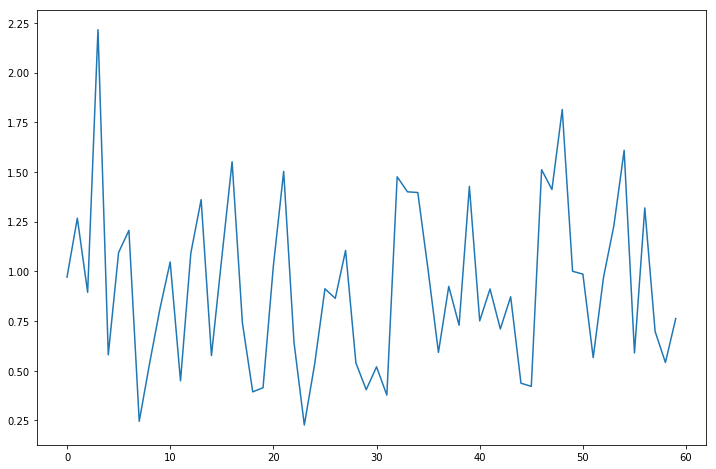

In [312]:
window = np.zeros((sample_size, ))
window_size = 20
window[sample_size//2 - window_size: sample_size//2 + window_size] = 1

num_psds = 60
psds = np.zeros((num_psds, psd.shape[0]))

realizations = v_t[random.sample(set(list(np.arange(v_t.shape[0]))), num_psds), :]

for i in range(num_psds):
    psds[i, :] = plt.psd(realizations[i], NFFT=100, Fs=1e4, window=window, scale_by_freq=False)[0]
    plt.clf()

mean_psds = psds.mean(axis=-1)
plt.figure(figsize=(12, 8))
plt.plot(mean_psds)

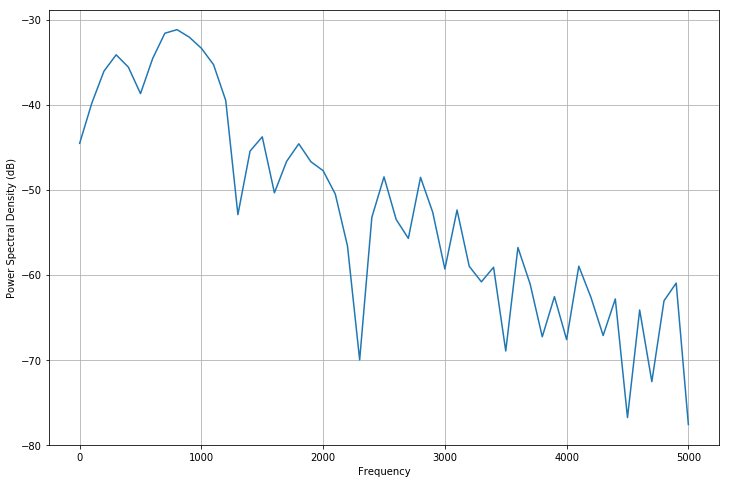

In [316]:
window_size = 5
window[sample_size//2 - window_size: sample_size//2 + window_size] = 1
plt.figure(figsize=(12, 8))
psd = plt.psd(np.cov(v_t, rowvar=False)[0, :], NFFT=100, Fs=1e4, window=window, scale_by_freq=False)[0]

In [44]:
z = np.cov(v_t, rowvar=False)

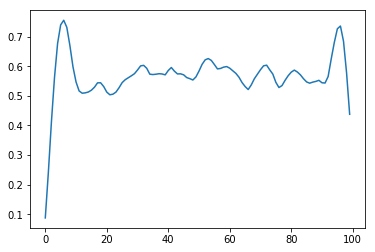

In [50]:
plt.plot(np.mean(z, axis=1))